# Lab 4: Genetic Data Analysis with PCA, Clustering, and Regression-1

- Name: AbdelRahman Adel AbdelFattah
- ID: 17012296


## Objective




Teach students how to perform Principal Component Analysis (PCA), clustering, and linear regression on genetic data using PLINK and R.

## Prerequisites

- Basic knowledge of genetics and R programming
- Completion of Lecture Assignment 1 on Genetic Data Analysis using PLINK
- Installed PLINK and R software
- Familiarity with terminal or command-line interface

In [59]:
install.packages("ggplot2")
install.packages("scatterplot3d")
install.packages("gridExtra")
install.packages("factoextra")
install.packages("NbClust")
install.packages("dendextend")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [60]:
library(ggplot2)
library(scatterplot3d)
library(gridExtra)
library(factoextra)
library(NbClust)
library(dendextend)

In [61]:
shell_call <- function(command, ...) {
    result <- system(command, intern = TRUE, ...)
    cat(paste0(result, collapse = "\n"))
}

## Part 1: Principal Component Analysis Using PLINK

### Task 1.1: Compute PCA

Run PCA on your dataset using the following PLINK command:

!plink --file [filename] --pca --out [pca_outputname]

Hint: Replace [filename] and [pca_outputname] with the appropriate names.

In [62]:
shell_call("chmod a+x plink")

In [63]:
shell_call("./plink --noweb --bfile Qatari156_filtered_pruned --pca --out pca_results")

PLINK v1.90b7.1 64-bit (18 Oct 2023)           www.cog-genomics.org/plink/1.9/
(C) 2005-2023 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to pca_results.log.
Options in effect:
  --bfile Qatari156_filtered_pruned
  --noweb
  --out pca_results
  --pca

Note: --noweb has no effect since no web check is implemented yet.
12982 MB RAM detected; reserving 6491 MB for main workspace.
67735 variants loaded from .bim file.
156 people (49 males, 107 females) loaded from .fam.
Using up to 2 threads (change this with --threads).
Before main variant filters, 156 founders and 0 nonfounders present.
Calculating allele frequencies... 0%1%2%3%4%5%6%7%8%9%10%11%12%13%14%15%16%17%18%19%20%21%22%23%24%25%26%27%28%29%30%31%32%33%34%35%36%37%38%39%40%41%42%43%44%45%46%47%48%49%50%51%52%53%54%55%56%57%58%59%60%

### Task 1.2: View Eigenvalues and Eigenvectors

Use the awk, vi, and head commands to view the eigenvalues and eigenvectors.

Hint:

You can use awk '{print $0}' [pca_outputname].eigenval to view the eigenvalues. Alternatively, use vi [pca_outputname].eigenval to open the file in a text editor, or head [pca_outputname].eigenval to view the first few lines of the file. Do the same for the eigenvectors with [pca_outputname].eigenvec.

!awk '{print $0}' [pca_outputname].eigenval

!awk '{print $0}' [pca_outputname].eigenvec


Hint: Replace [pca_outputname] with the name you specified earlier. Hint note vi command might not work at google colab environment.

In [64]:
shell_call("head pca_results.eigenval")
shell_call("echo '\n-------------------\n'")
shell_call("awk '{print $0}' pca_results.eigenval")

5.15175
2.48604
1.71927
1.43383
1.40058
1.33119
1.22761
1.21348
1.21026
1.20342
-------------------
5.15175
2.48604
1.71927
1.43383
1.40058
1.33119
1.22761
1.21348
1.21026
1.20342
1.19054
1.18396
1.17912
1.17285
1.16939
1.16001
1.15469
1.1476
1.14399
1.1416

In [65]:
shell_call("head pca_results.eigenvec")
shell_call("echo '\n-------------------\n'")
shell_call("awk '{print $0}' pca_results.eigenvec")

QBC-092 QBC-092 0.0218693 0.0448916 -0.00496361 0.00765635 0.0135592 -0.0667763 -0.0719573 0.0244424 0.0318374 0.0269051 -0.0439191 0.058498 -0.0165928 0.0585131 -0.0113748 0.0390337 0.0570111 0.102117 -0.0634754 -0.107917
QBC-256 QBC-256 -0.0402523 -0.0078324 -0.0741329 0.0120635 0.00890426 0.0343863 0.024171 0.00614805 -0.0054185 0.00577891 0.00219037 -0.0231143 0.0366974 0.0151684 0.0365675 -0.0109055 -0.00612176 -0.06983 -0.0359418 -0.0234415
QBC-107 QBC-107 -0.0374178 -0.0171582 -0.0814909 -0.00890976 0.0108377 0.0481822 0.0352973 0.0364176 -0.030729 -0.00665287 0.0333317 0.0476545 -0.0333446 0.0273149 -0.024976 -0.0329807 0.0115517 -0.0782309 -0.011165 -0.00107099
QBC-171 QBC-171 -0.0187082 0.0485504 0.164359 -0.00709236 0.00352027 0.109492 -0.0260362 -0.0152478 -0.0317786 0.040206 -0.000406422 -0.0048674 0.00679896 0.00615756 -0.0287145 -0.0535603 -0.0069499 -0.0102171 0.0243864 -0.00208793
QPRC-110 QPRC-110 -0.0231858 0.121632 0.0345452 -0.0490419 0.0111997 -0.111799 0.00674255

### Task 1.3: 2D Plot of Major PCA Components

Load the PCA results into R and create a 2D plot of the first two principal components.

Hint: You can use ggplot2 package for this task. Example: ggplot(data, aes(x=PC1, y=PC2)) + geom_point().

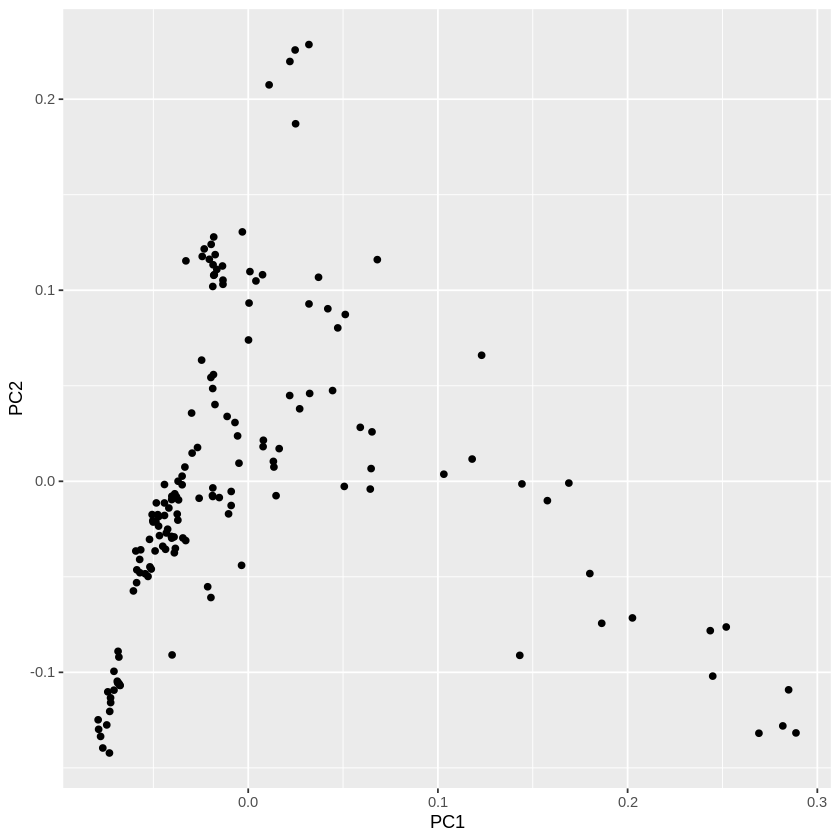

In [66]:
eigen_vecs <- read.table("pca_results.eigenvec", header = FALSE)
data <- data.frame(PC1 = eigen_vecs$V3, PC2 = eigen_vecs$V4)

ggplot(data, aes(x = PC1, y = PC2)) + geom_point() + labs(x = "PC1", y = "PC2")

### Task 1.4: 3D Plot of Major PCA Components

Create a 3D plot of the first three principal components.

Hint: You can use scatterplot3d package for 3D plots.

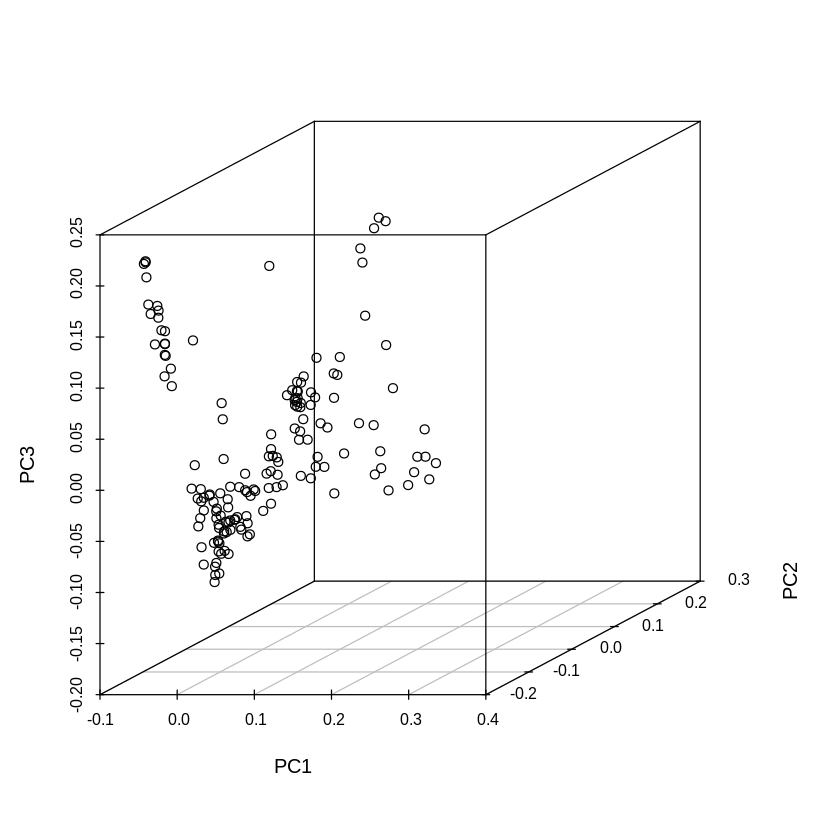

In [67]:
data <- data.frame(PC1 = eigen_vecs$V3, PC2 = eigen_vecs$V4, PC3 = eigen_vecs$V5)
scatterplot3d(data$PC1, data$PC2, data$PC3, xlab = "PC1", ylab = "PC2", zlab = "PC3")

### Task 1.5: Plotting PC1 vs PC2, PC1 vs PC3, and PC2 vs PC3

Create plots comparing PC1 vs PC2, PC1 vs PC3, and PC2 vs PC3.

Hint: You can use gridExtra package to arrange multiple plots on a single page.

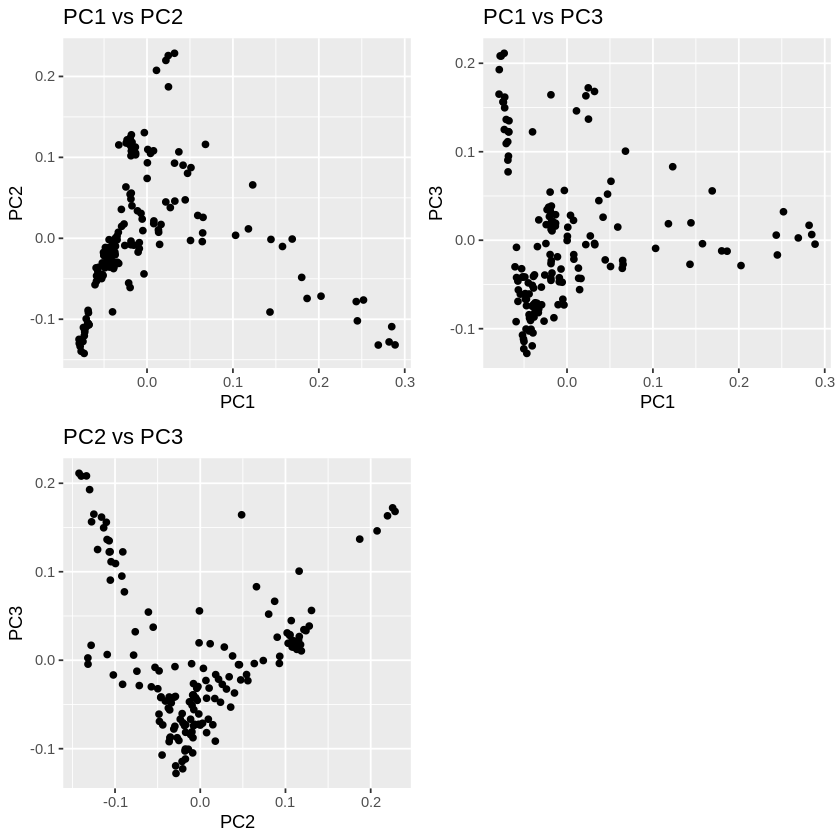

In [68]:
plot1 <- ggplot(data, aes(x = PC1, y = PC2)) + geom_point() + labs(x = "PC1", y = "PC2") + ggtitle("PC1 vs PC2")
plot2 <- ggplot(data, aes(x = PC1, y = PC3)) + geom_point() + labs(x = "PC1", y = "PC3") + ggtitle("PC1 vs PC3")
plot3 <- ggplot(data, aes(x = PC2, y = PC3)) + geom_point() + labs(x = "PC2", y = "PC3") + ggtitle("PC2 vs PC3")

grid.arrange(plot1, plot2, plot3, ncol = 2)

## Part 2: Clustering and Visualization in R

### Task 2.1: Determine Optimal Number of Clusters

Consider using the NbClust, factoextra, or cluster packages in R to determine the optimal number of clusters. The fviz_nbclust function from factoextra can help you visualize the optimal number of clusters by various methods such as the elbow method or silhouette method

In [69]:
data <- read.table("pca_results.eigenvec", header = FALSE)
data <- data.frame(PC1 = data$V3, PC2 = data$V4, PC3 = data$V5)

In [70]:
methods_nbclust <- c("ward.D", "ward.D2", "single", "complete", "average", "mcquitty", "median", "centroid", "kmeans")

##### NbClust

[1] "ward.D"
*** : The Hubert index is a graphical method of determining the number of clusters.
                In the plot of Hubert index, we seek a significant knee that corresponds to a 
                significant increase of the value of the measure i.e the significant peak in Hubert
                index second differences plot. 
 


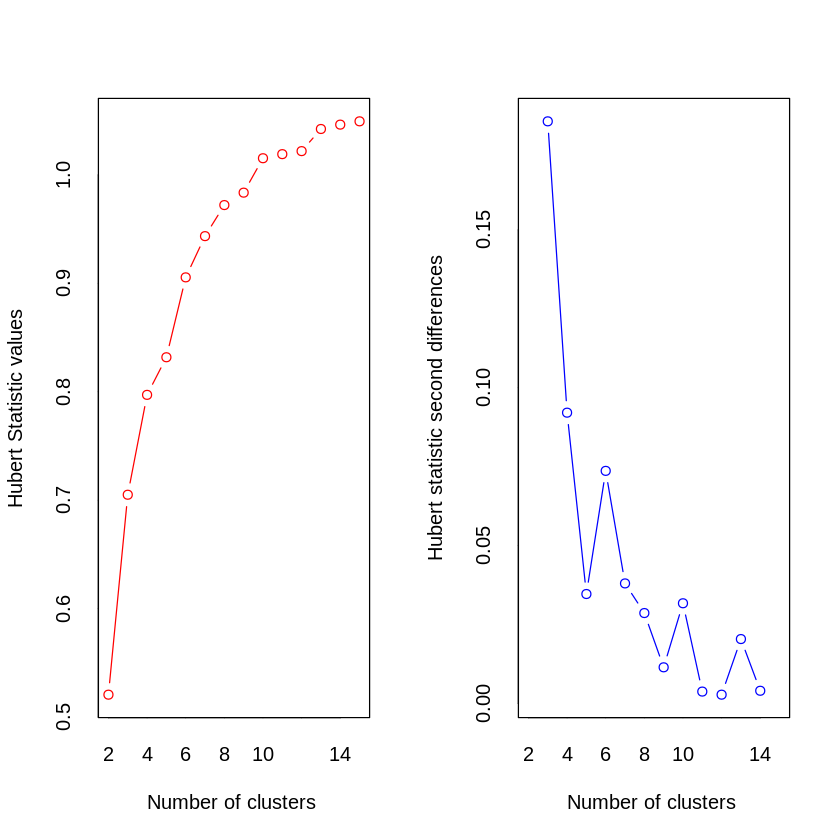

*** : The D index is a graphical method of determining the number of clusters. 
                In the plot of D index, we seek a significant knee (the significant peak in Dindex
                second differences plot) that corresponds to a significant increase of the value of
                the measure. 
 
******************************************************************* 
* Among all indices:                                                
* 3 proposed 2 as the best number of clusters 
* 3 proposed 3 as the best number of clusters 
* 12 proposed 4 as the best number of clusters 
* 1 proposed 11 as the best number of clusters 
* 1 proposed 12 as the best number of clusters 
* 2 proposed 14 as the best number of clusters 
* 1 proposed 15 as the best number of clusters 

                   ***** Conclusion *****                            
 
* According to the majority rule, the best number of clusters is  4 
 
 
******************************************************************* 
[1

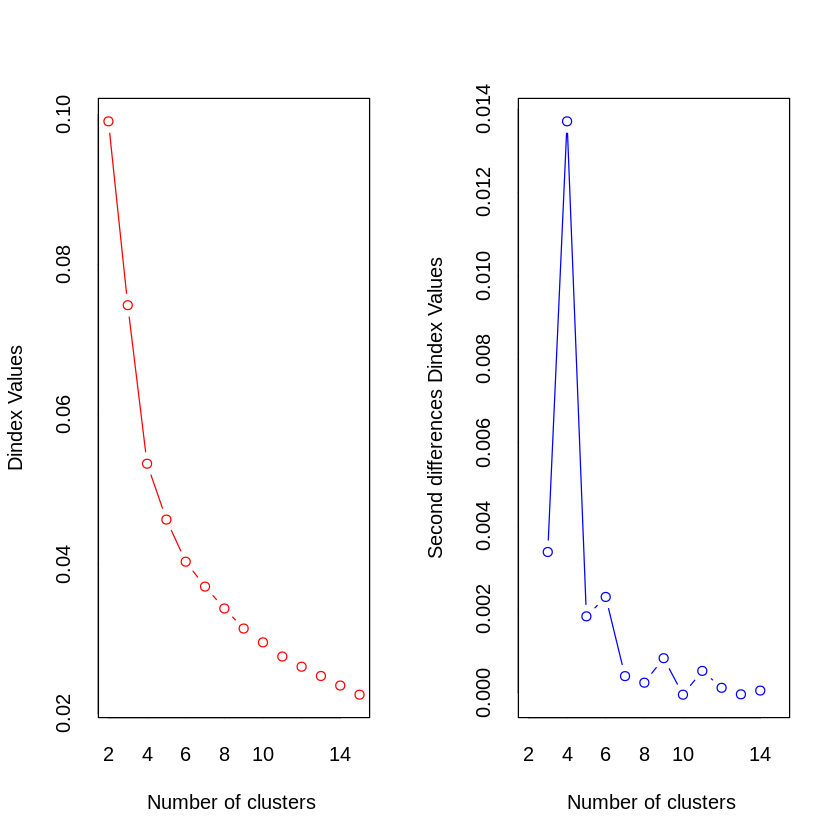

*** : The Hubert index is a graphical method of determining the number of clusters.
                In the plot of Hubert index, we seek a significant knee that corresponds to a 
                significant increase of the value of the measure i.e the significant peak in Hubert
                index second differences plot. 
 


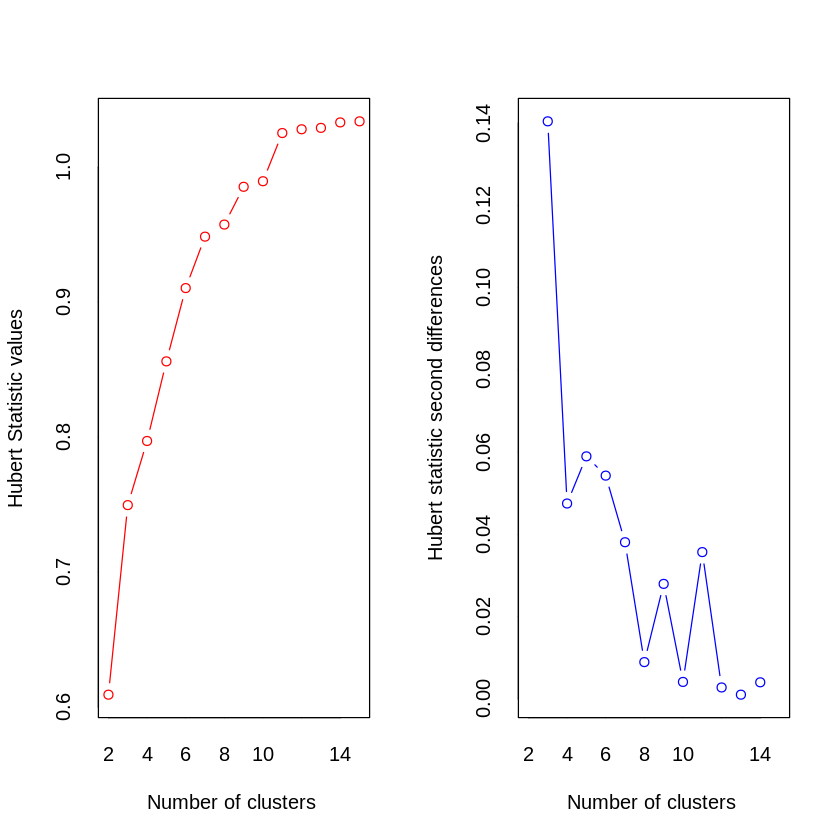

*** : The D index is a graphical method of determining the number of clusters. 
                In the plot of D index, we seek a significant knee (the significant peak in Dindex
                second differences plot) that corresponds to a significant increase of the value of
                the measure. 
 
******************************************************************* 
* Among all indices:                                                
* 4 proposed 2 as the best number of clusters 
* 4 proposed 3 as the best number of clusters 
* 6 proposed 4 as the best number of clusters 
* 4 proposed 5 as the best number of clusters 
* 1 proposed 14 as the best number of clusters 
* 4 proposed 15 as the best number of clusters 

                   ***** Conclusion *****                            
 
* According to the majority rule, the best number of clusters is  4 
 
 
******************************************************************* 
[1] "end of method ======================="
[1] "sin

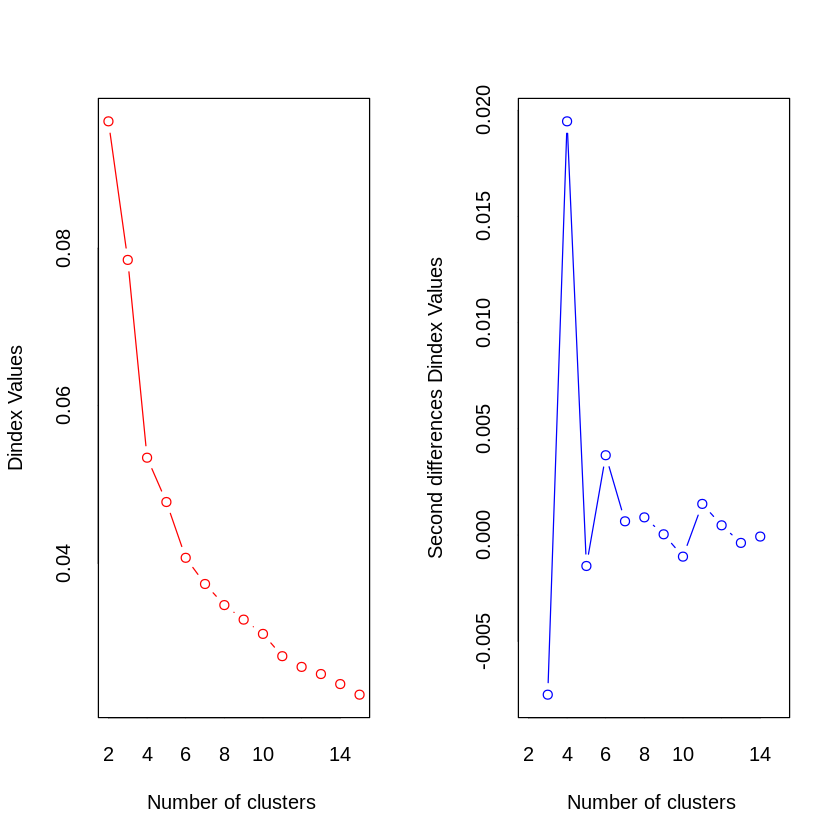

*** : The Hubert index is a graphical method of determining the number of clusters.
                In the plot of Hubert index, we seek a significant knee that corresponds to a 
                significant increase of the value of the measure i.e the significant peak in Hubert
                index second differences plot. 
 


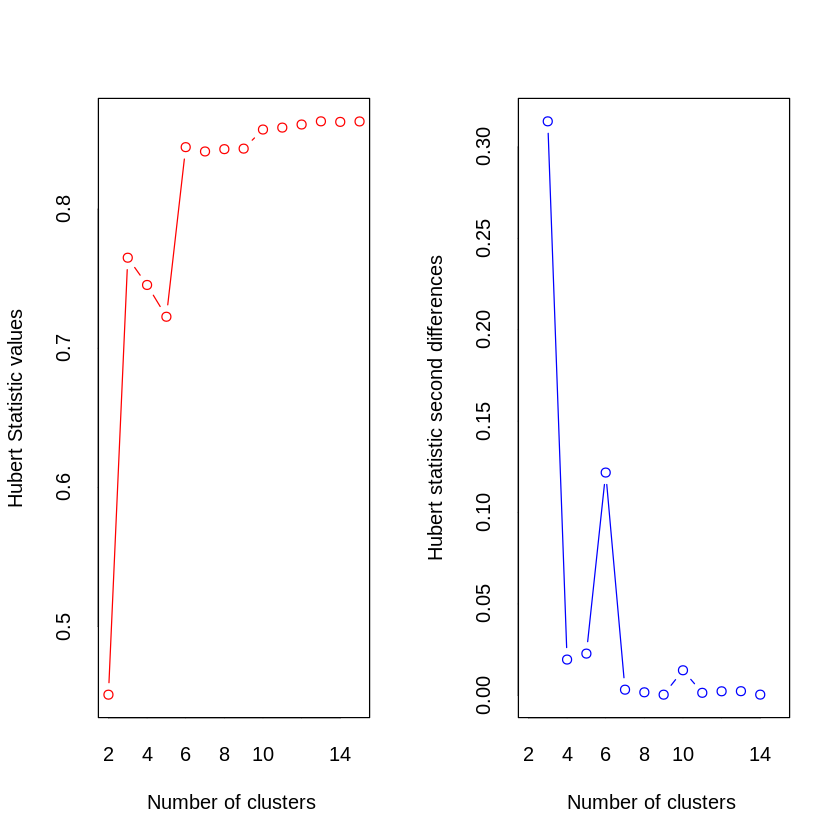

*** : The D index is a graphical method of determining the number of clusters. 
                In the plot of D index, we seek a significant knee (the significant peak in Dindex
                second differences plot) that corresponds to a significant increase of the value of
                the measure. 
 
******************************************************************* 
* Among all indices:                                                
* 5 proposed 2 as the best number of clusters 
* 1 proposed 3 as the best number of clusters 
* 3 proposed 5 as the best number of clusters 
* 9 proposed 6 as the best number of clusters 
* 1 proposed 10 as the best number of clusters 
* 1 proposed 11 as the best number of clusters 
* 1 proposed 13 as the best number of clusters 
* 1 proposed 14 as the best number of clusters 
* 1 proposed 15 as the best number of clusters 

                   ***** Conclusion *****                            
 
* According to the majority rule, the best number 

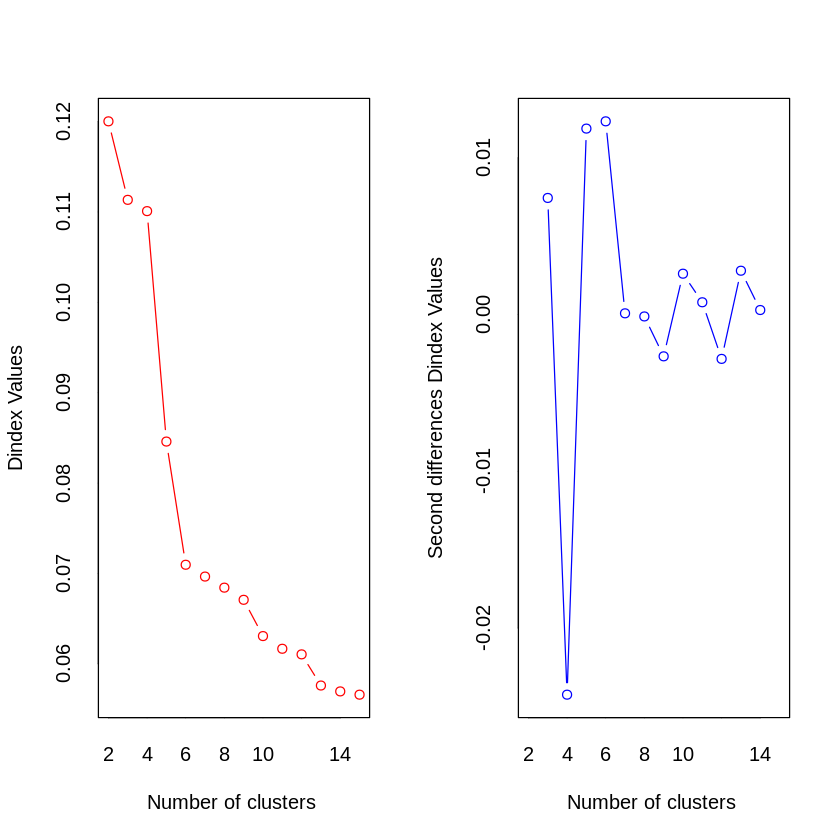

*** : The Hubert index is a graphical method of determining the number of clusters.
                In the plot of Hubert index, we seek a significant knee that corresponds to a 
                significant increase of the value of the measure i.e the significant peak in Hubert
                index second differences plot. 
 


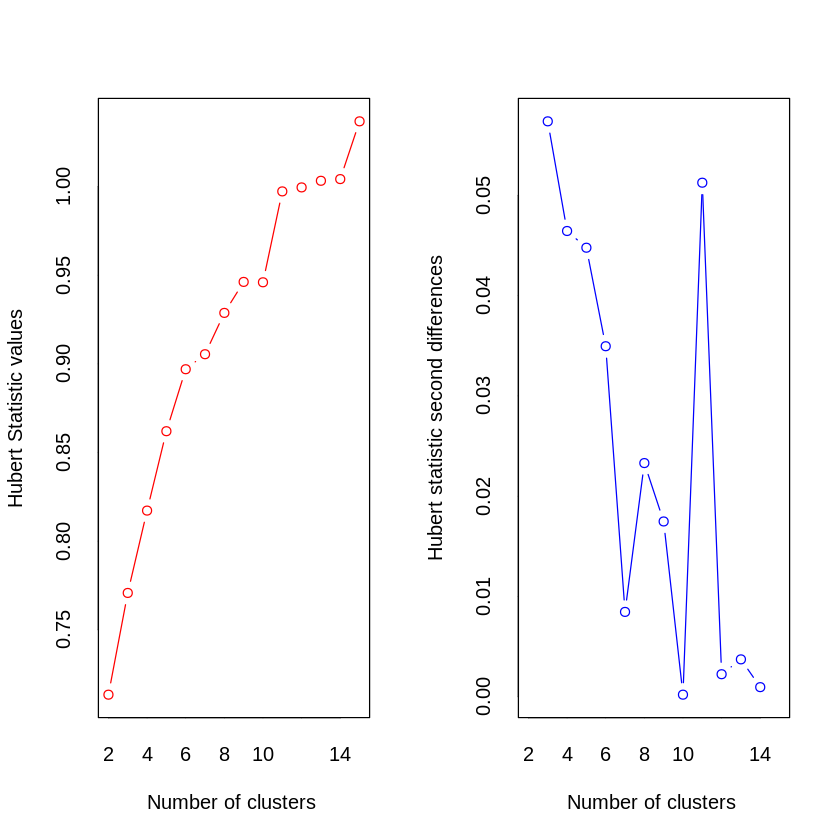

*** : The D index is a graphical method of determining the number of clusters. 
                In the plot of D index, we seek a significant knee (the significant peak in Dindex
                second differences plot) that corresponds to a significant increase of the value of
                the measure. 
 
******************************************************************* 
* Among all indices:                                                
* 4 proposed 2 as the best number of clusters 
* 2 proposed 3 as the best number of clusters 
* 7 proposed 4 as the best number of clusters 
* 1 proposed 5 as the best number of clusters 
* 1 proposed 6 as the best number of clusters 
* 2 proposed 9 as the best number of clusters 
* 1 proposed 14 as the best number of clusters 
* 5 proposed 15 as the best number of clusters 

                   ***** Conclusion *****                            
 
* According to the majority rule, the best number of clusters is  4 
 
 
***************************

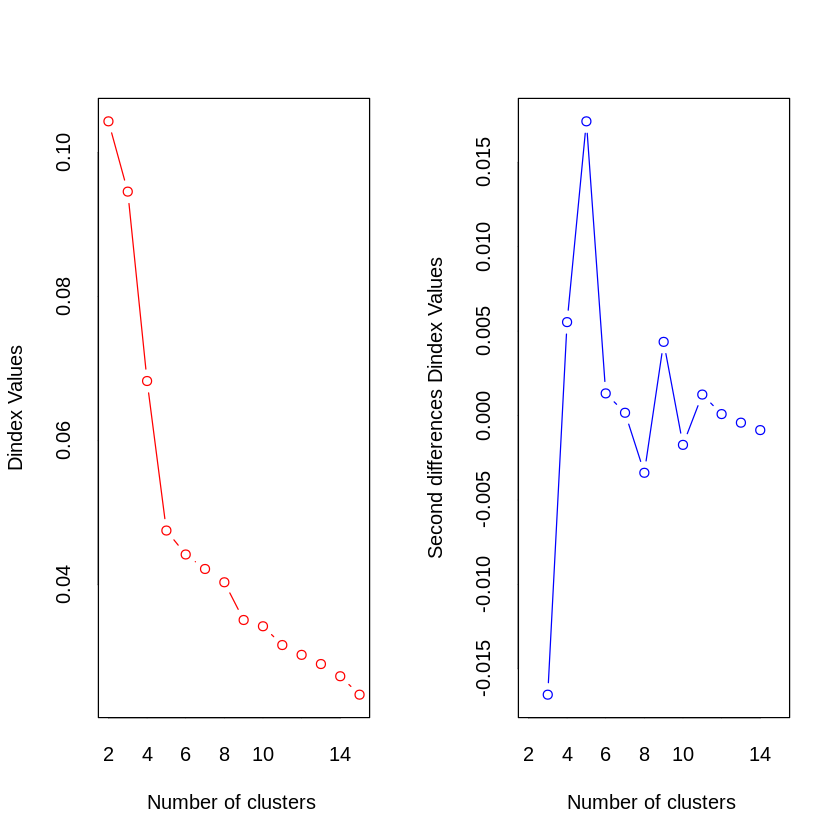

*** : The Hubert index is a graphical method of determining the number of clusters.
                In the plot of Hubert index, we seek a significant knee that corresponds to a 
                significant increase of the value of the measure i.e the significant peak in Hubert
                index second differences plot. 
 
*** : The D index is a graphical method of determining the number of clusters. 
                In the plot of D index, we seek a significant knee (the significant peak in Dindex
                second differences plot) that corresponds to a significant increase of the value of
                the measure. 
 
******************************************************************* 
* Among all indices:                                                
* 5 proposed 2 as the best number of clusters 
* 1 proposed 3 as the best number of clusters 
* 6 proposed 4 as the best number of clusters 
* 1 proposed 5 as the best number of clusters 
* 3 proposed 7 as the best number 

Warning message in pf(beale, pp, df2):
“NaNs produced”


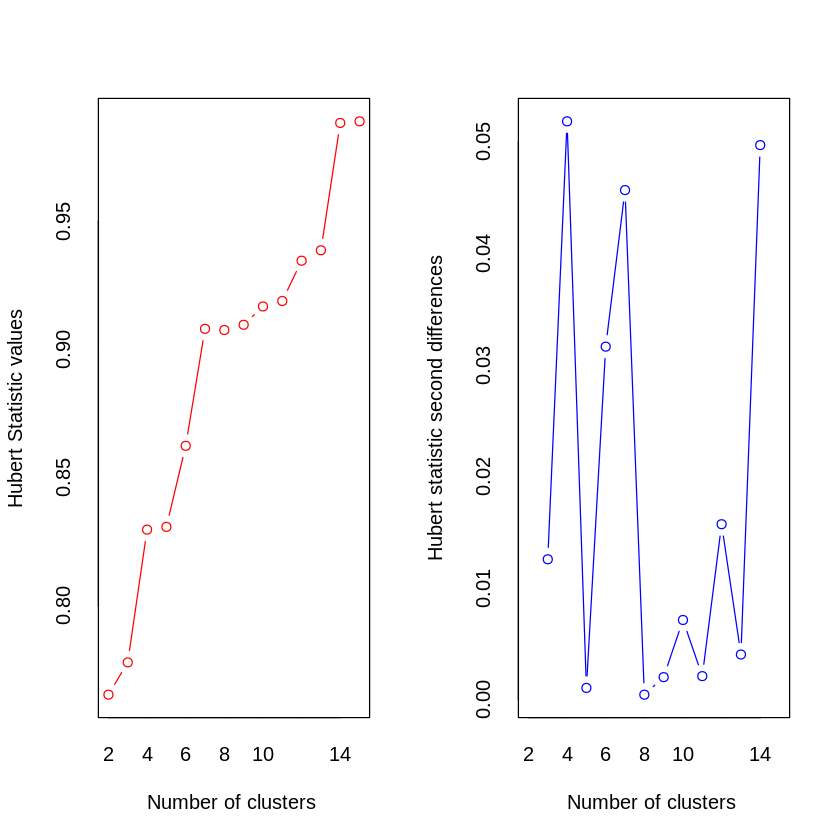

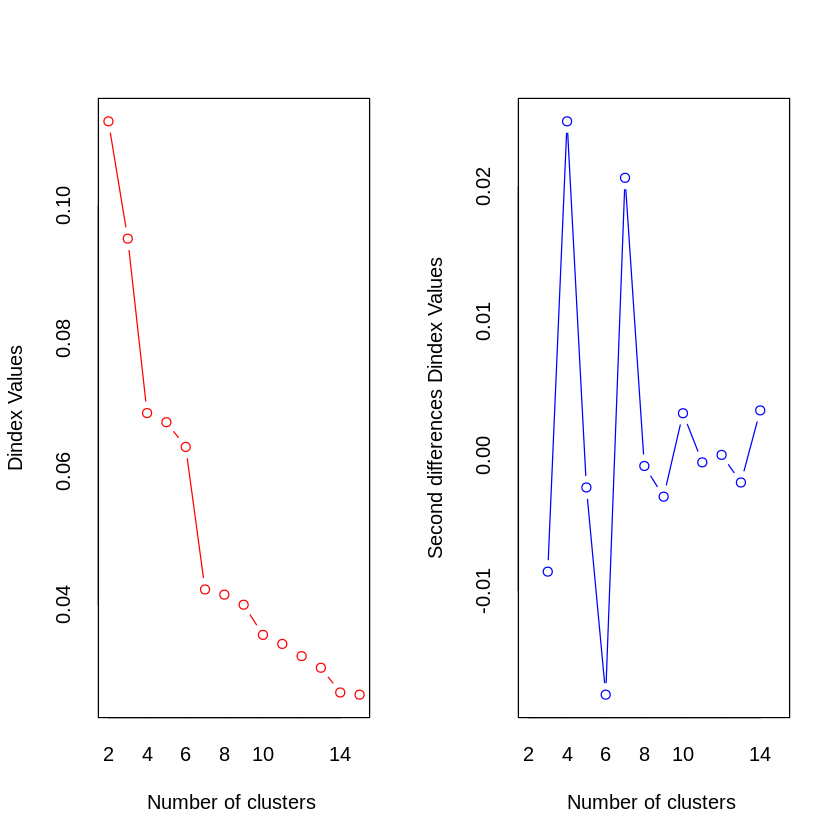

*** : The Hubert index is a graphical method of determining the number of clusters.
                In the plot of Hubert index, we seek a significant knee that corresponds to a 
                significant increase of the value of the measure i.e the significant peak in Hubert
                index second differences plot. 
 
*** : The D index is a graphical method of determining the number of clusters. 
                In the plot of D index, we seek a significant knee (the significant peak in Dindex
                second differences plot) that corresponds to a significant increase of the value of
                the measure. 
 
******************************************************************* 
* Among all indices:                                                
* 5 proposed 2 as the best number of clusters 
* 1 proposed 3 as the best number of clusters 
* 6 proposed 4 as the best number of clusters 
* 3 proposed 5 as the best number of clusters 
* 2 proposed 7 as the best number 

Warning message in pf(beale, pp, df2):
“NaNs produced”


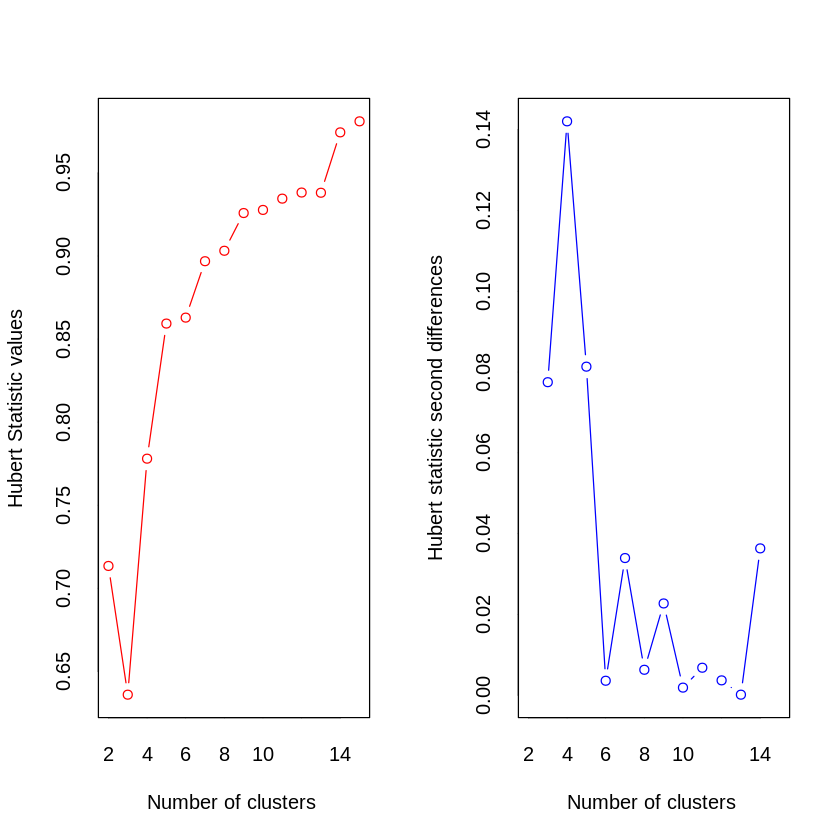

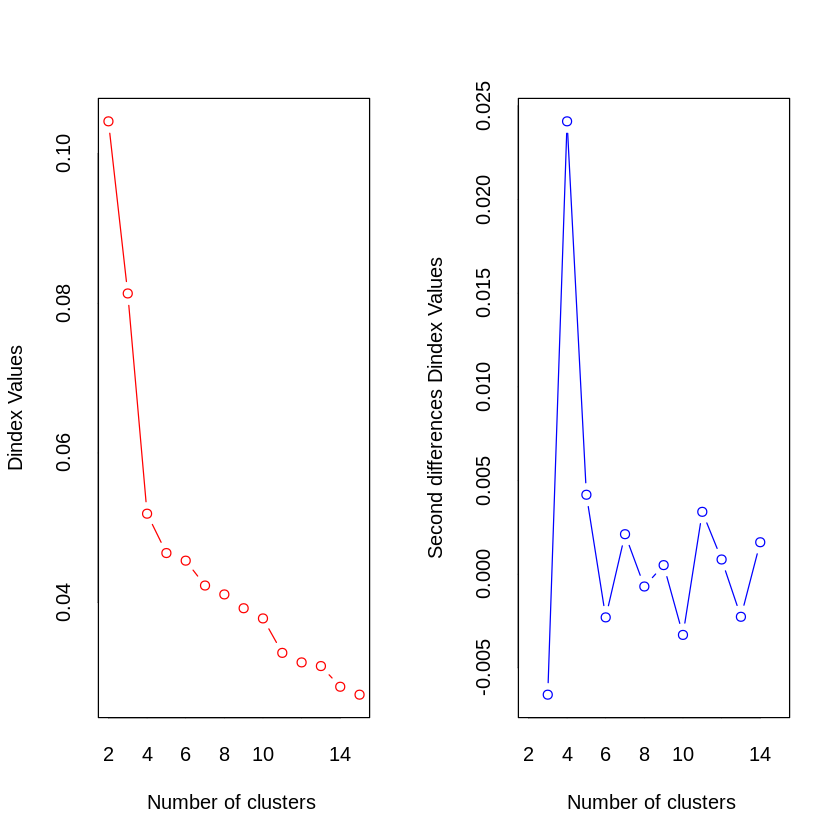

*** : The Hubert index is a graphical method of determining the number of clusters.
                In the plot of Hubert index, we seek a significant knee that corresponds to a 
                significant increase of the value of the measure i.e the significant peak in Hubert
                index second differences plot. 
 
*** : The D index is a graphical method of determining the number of clusters. 
                In the plot of D index, we seek a significant knee (the significant peak in Dindex
                second differences plot) that corresponds to a significant increase of the value of
                the measure. 
 
******************************************************************* 
* Among all indices:                                                
* 2 proposed 2 as the best number of clusters 
* 8 proposed 3 as the best number of clusters 
* 2 proposed 4 as the best number of clusters 
* 1 proposed 5 as the best number of clusters 
* 1 proposed 7 as the best number 

Warning message in pf(beale, pp, df2):
“NaNs produced”


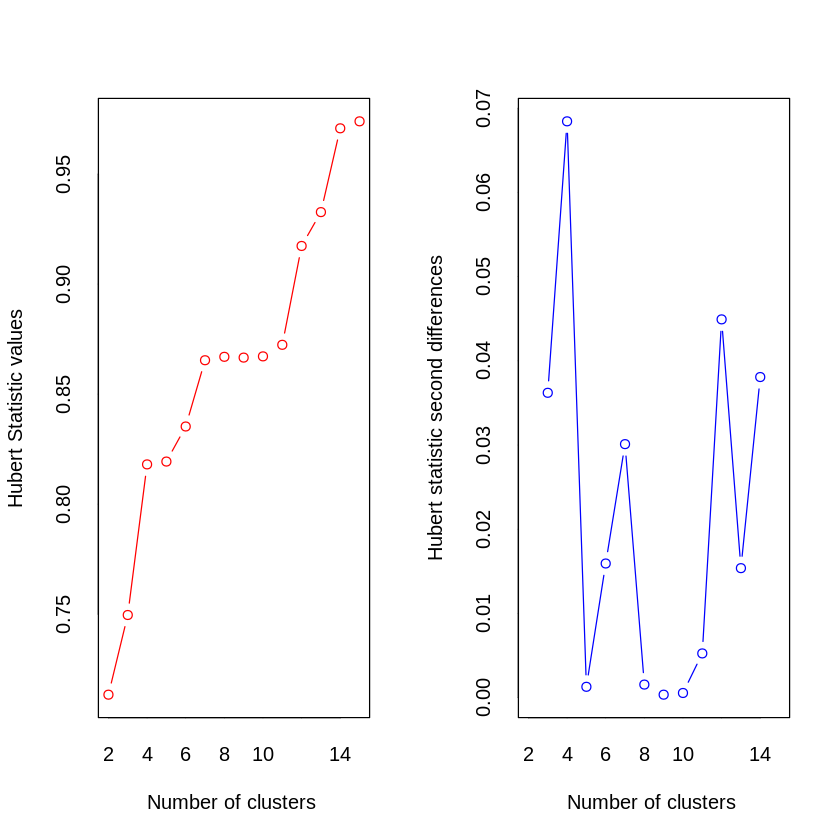

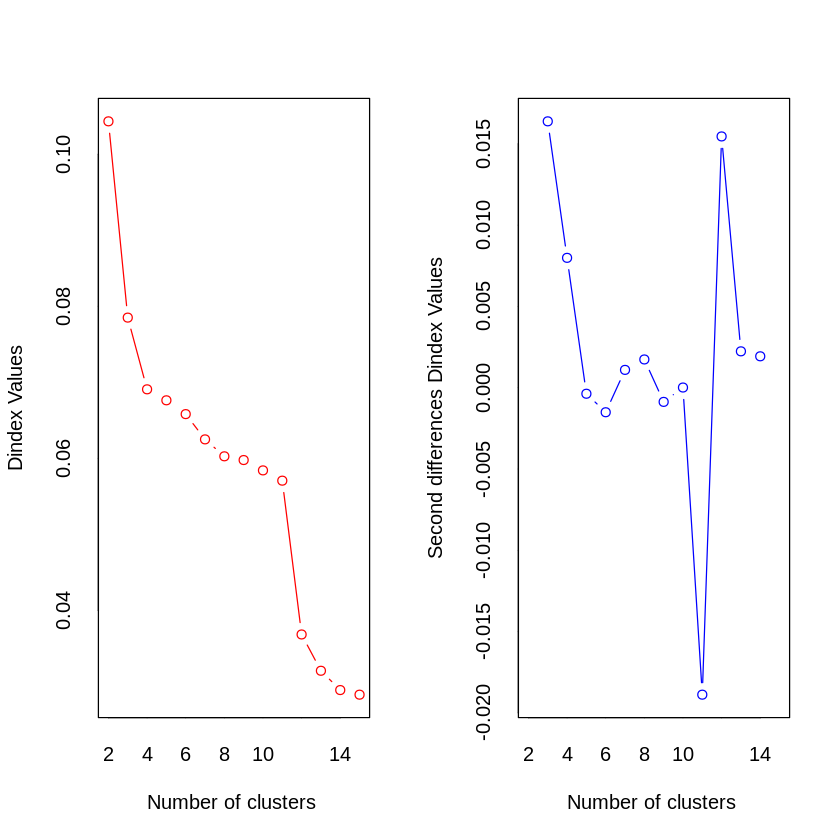

*** : The Hubert index is a graphical method of determining the number of clusters.
                In the plot of Hubert index, we seek a significant knee that corresponds to a 
                significant increase of the value of the measure i.e the significant peak in Hubert
                index second differences plot. 
 


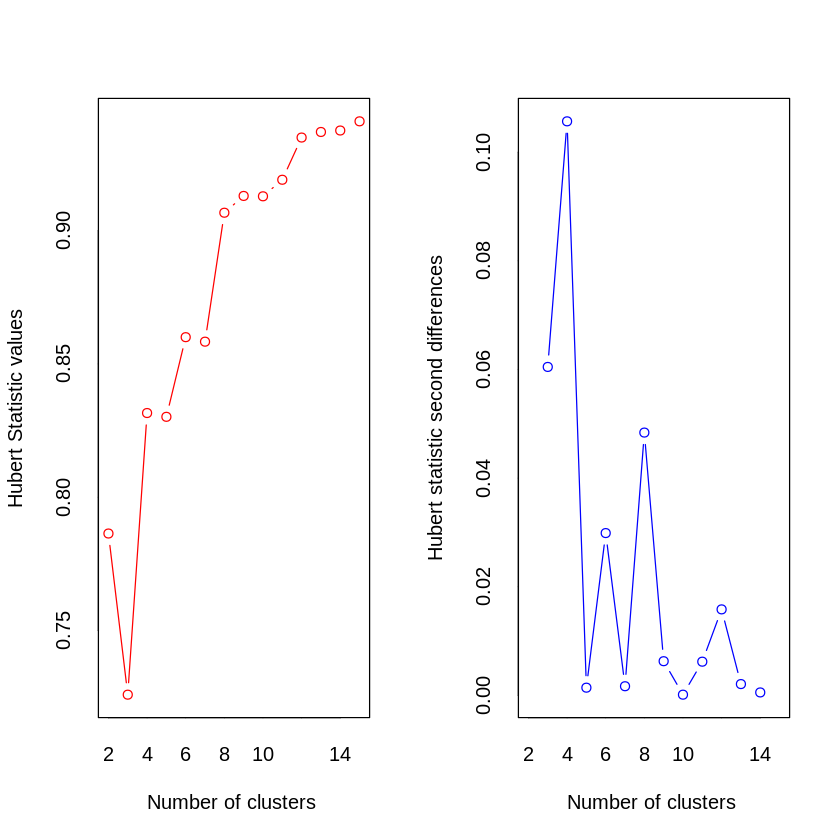

*** : The D index is a graphical method of determining the number of clusters. 
                In the plot of D index, we seek a significant knee (the significant peak in Dindex
                second differences plot) that corresponds to a significant increase of the value of
                the measure. 
 
******************************************************************* 
* Among all indices:                                                
* 6 proposed 2 as the best number of clusters 
* 4 proposed 3 as the best number of clusters 
* 5 proposed 4 as the best number of clusters 
* 1 proposed 7 as the best number of clusters 
* 4 proposed 8 as the best number of clusters 
* 1 proposed 13 as the best number of clusters 
* 1 proposed 14 as the best number of clusters 
* 2 proposed 15 as the best number of clusters 

                   ***** Conclusion *****                            
 
* According to the majority rule, the best number of clusters is  2 
 
 
**************************

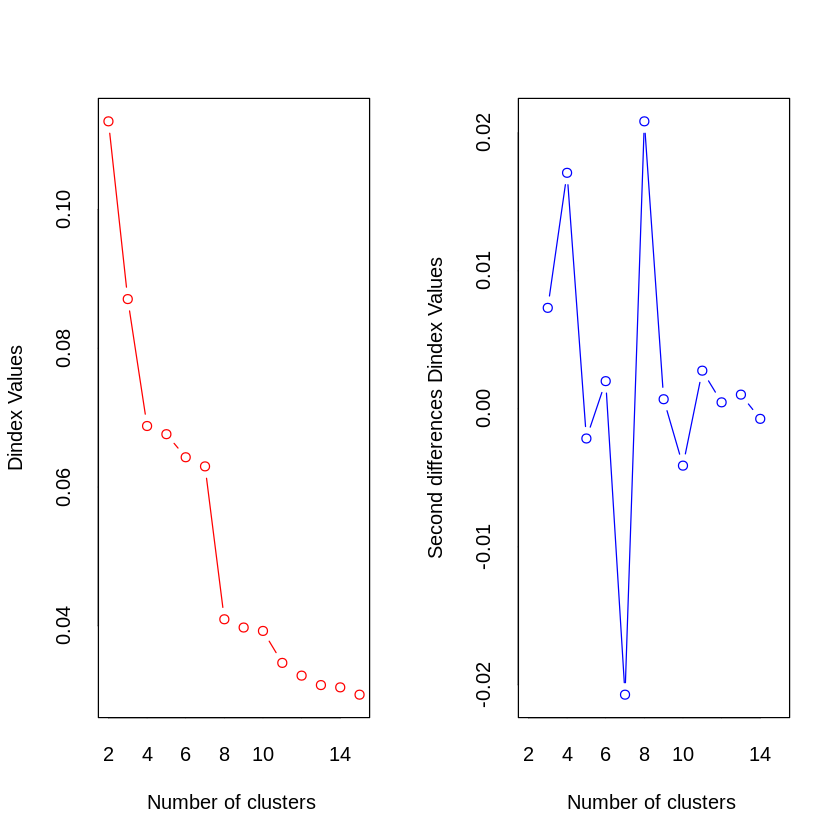

*** : The Hubert index is a graphical method of determining the number of clusters.
                In the plot of Hubert index, we seek a significant knee that corresponds to a 
                significant increase of the value of the measure i.e the significant peak in Hubert
                index second differences plot. 
 


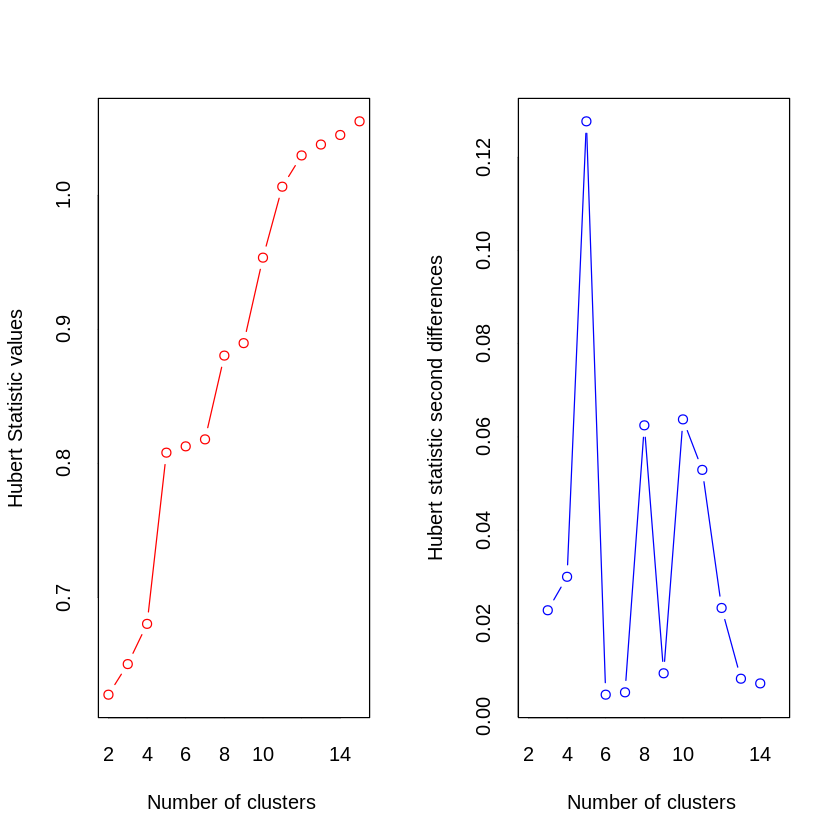

*** : The D index is a graphical method of determining the number of clusters. 
                In the plot of D index, we seek a significant knee (the significant peak in Dindex
                second differences plot) that corresponds to a significant increase of the value of
                the measure. 
 
******************************************************************* 
* Among all indices:                                                
* 4 proposed 2 as the best number of clusters 
* 1 proposed 3 as the best number of clusters 
* 10 proposed 5 as the best number of clusters 
* 1 proposed 6 as the best number of clusters 
* 2 proposed 8 as the best number of clusters 
* 1 proposed 10 as the best number of clusters 
* 1 proposed 11 as the best number of clusters 
* 2 proposed 13 as the best number of clusters 
* 1 proposed 15 as the best number of clusters 

                   ***** Conclusion *****                            
 
* According to the majority rule, the best number 

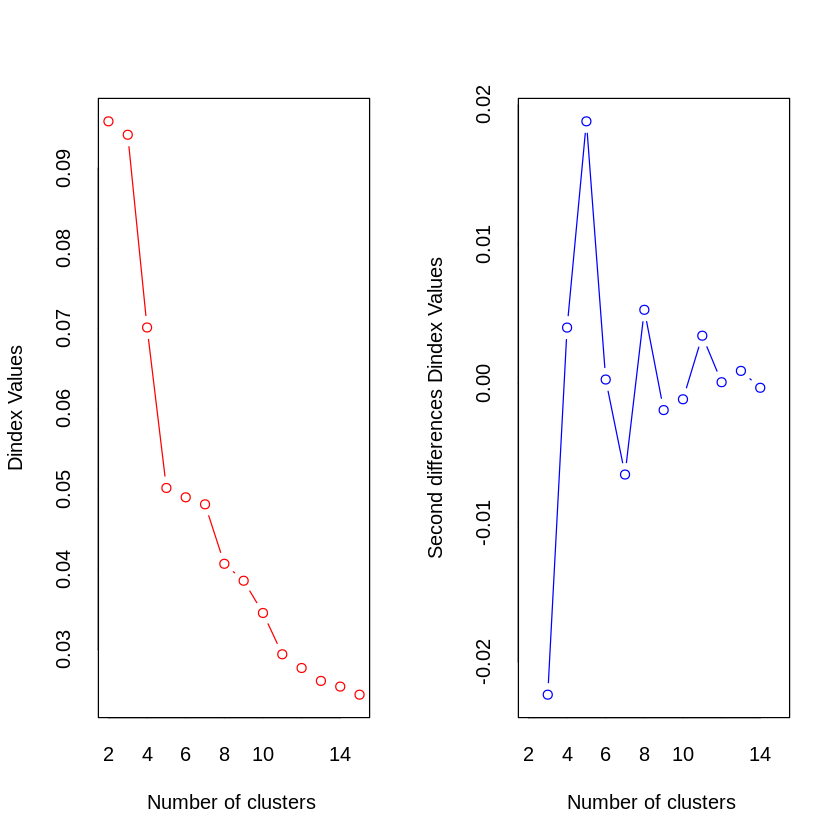

In [71]:
for(m in methods_nbclust){
    print(m)
    NbClust(data, method = m)
    print("end of method =======================")
}

##### Elbow method

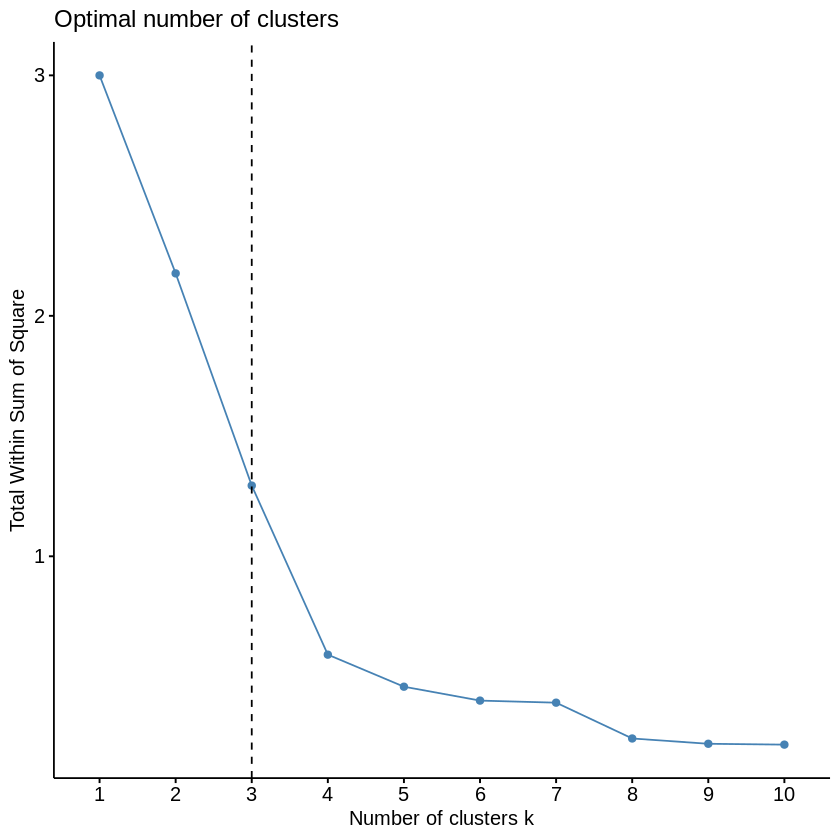

In [72]:
fviz_nbclust(data, kmeans, method ="wss") + geom_vline(xintercept = 3, linetype = 2)

##### Silhouette method

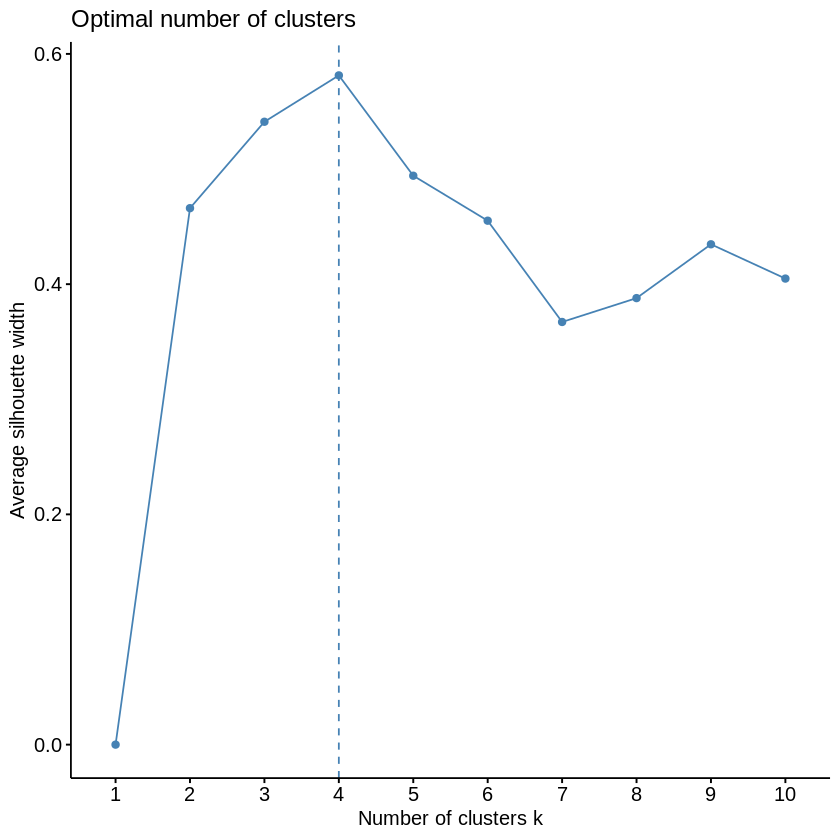

In [73]:
fviz_nbclust(data, kmeans, method="silhouette")

### Task 2.2: perform Cluster

Perform clustering on the PC1,PC2,PC3 and using number of target clusters = 3
You can use k-means clustering with kmeans() function or any other clustering methods

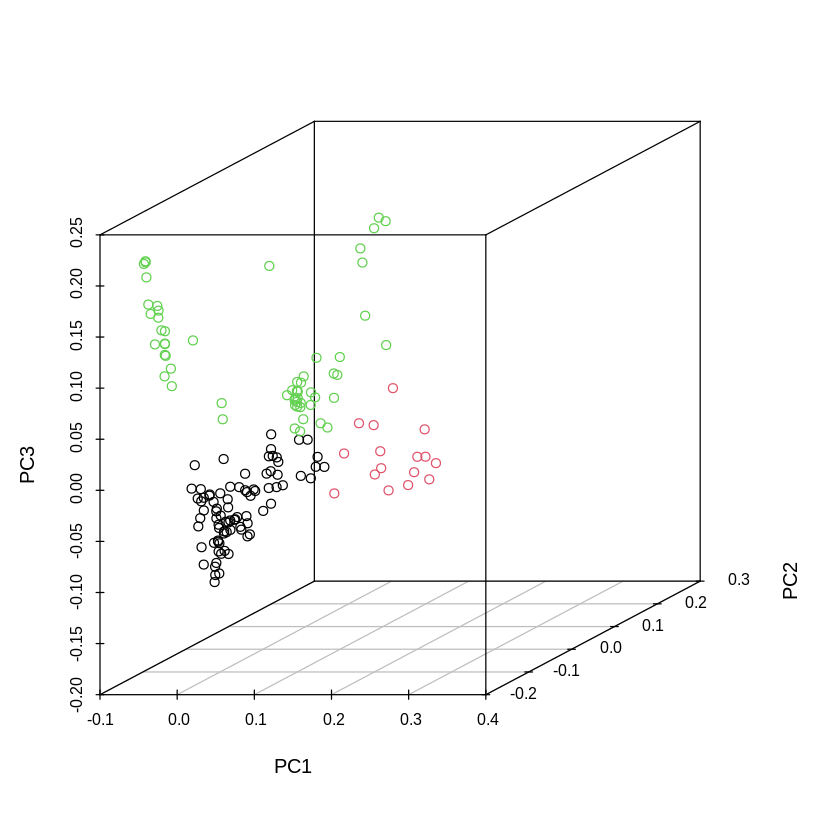

In [74]:
kmeans_result<-kmeans(data, centers = 3)

k_means_clusters <- data
k_means_clusters$cluster <- as.factor(kmeans_result$cluster)

scatterplot3d(k_means_clusters$PC1, k_means_clusters$PC2, k_means_clusters$PC3, color = k_means_clusters$cluster, xlab = "PC1", ylab = "PC2", zlab = "PC3")

### Task 2.3: Perform Hierarchical Clustering

Try hierarchical clustering methods, specifically single linkage and average linkage clustering.

Hint:

Use the hclust() function in R and specify the method as either "single" for single linkage or "average" for average linkage. For example, hclust(dist(your_data), method="single") for single linkage.

##### Single

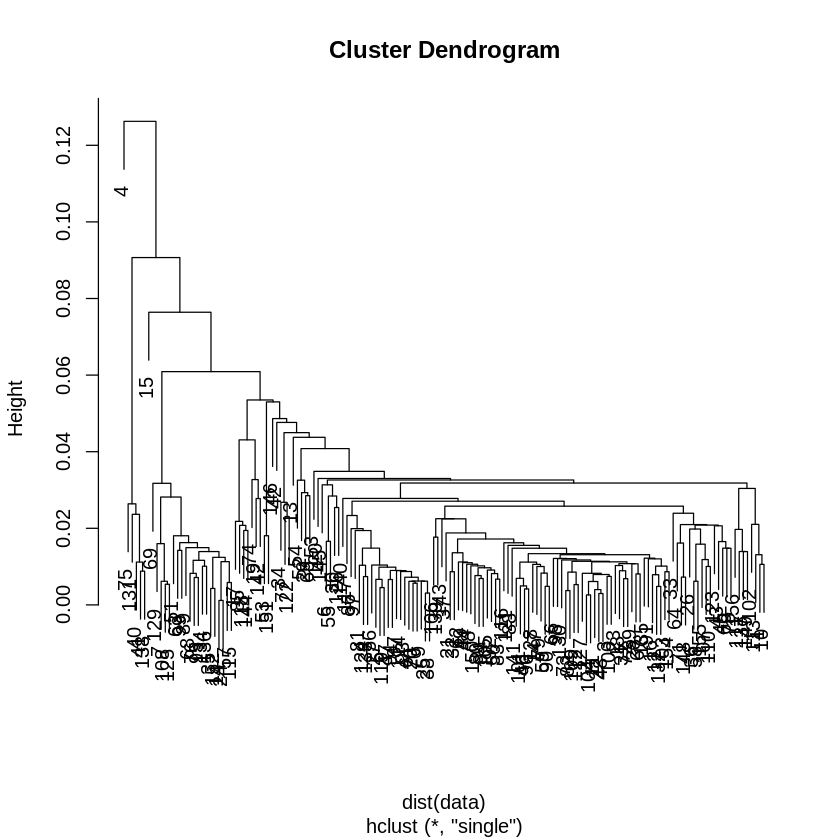

In [75]:
single <- hclust(dist(data), method="single")
plot(single)

##### Average

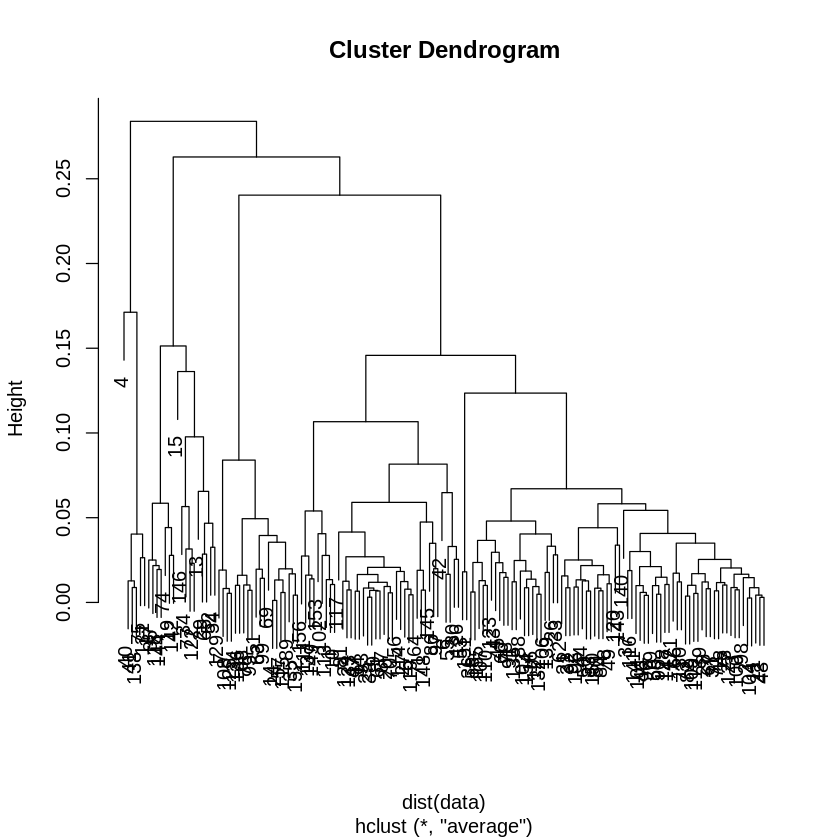

In [76]:
average <- hclust(dist(data), method="average")
plot(average)

### Task 2.4: Visualize Clusters with Colors

Visualize the clusters based on the first three principal components using different colors for each cluster.

Hint:

You can use ggplot2's geom_point() function and set the aes(color=cluster_id) to color points based on their cluster assignment.

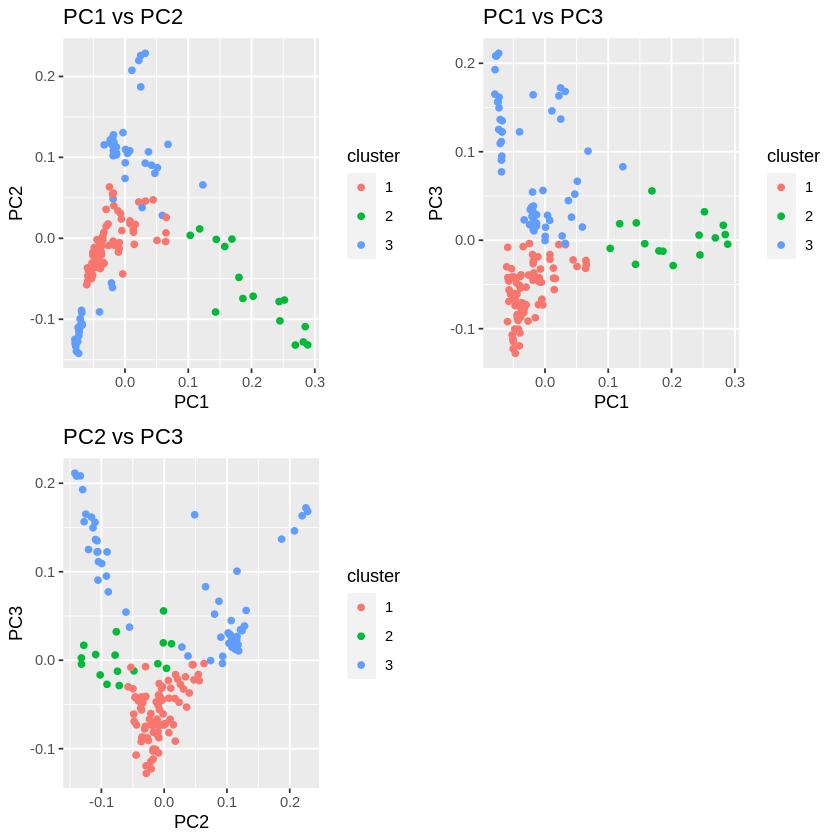

In [77]:
plot1 <- ggplot(k_means_clusters, aes(x = PC1, y = PC2, color = cluster)) + geom_point() + labs(x = "PC1", y = "PC2") + ggtitle("PC1 vs PC2")
plot2 <- ggplot(k_means_clusters, aes(x = PC1, y = PC3, color = cluster)) + geom_point() + labs(x = "PC1", y = "PC3") + ggtitle("PC1 vs PC3")
plot3 <- ggplot(k_means_clusters, aes(x = PC2, y = PC3, color = cluster)) + geom_point() + labs(x = "PC2", y = "PC3") + ggtitle("PC2 vs PC3")

grid.arrange(plot1, plot2, plot3, ncol = 2)

### Task 2.5: Compare Different Clustering Algorithms

Create a side-by-side comparison of the clusters formed by k-means, single linkage, and average linkage methods.

Hint:

You can use gridExtra's grid.arrange() function to plot multiple clustering results side by side for easy comparison. Make sure each plot uses different colors for each cluster to aid in comparison.

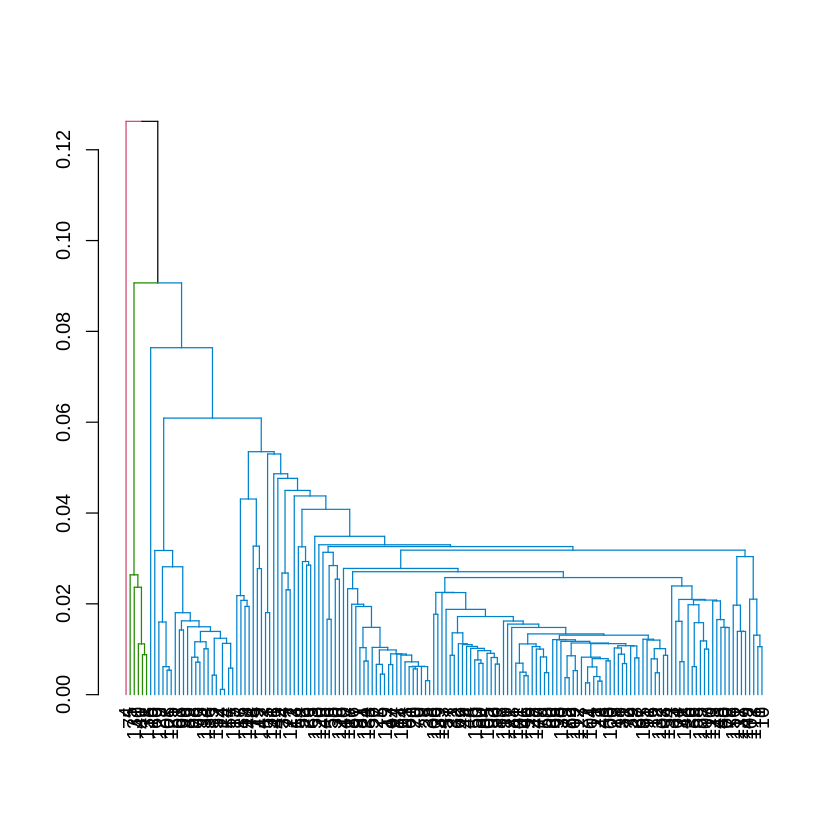

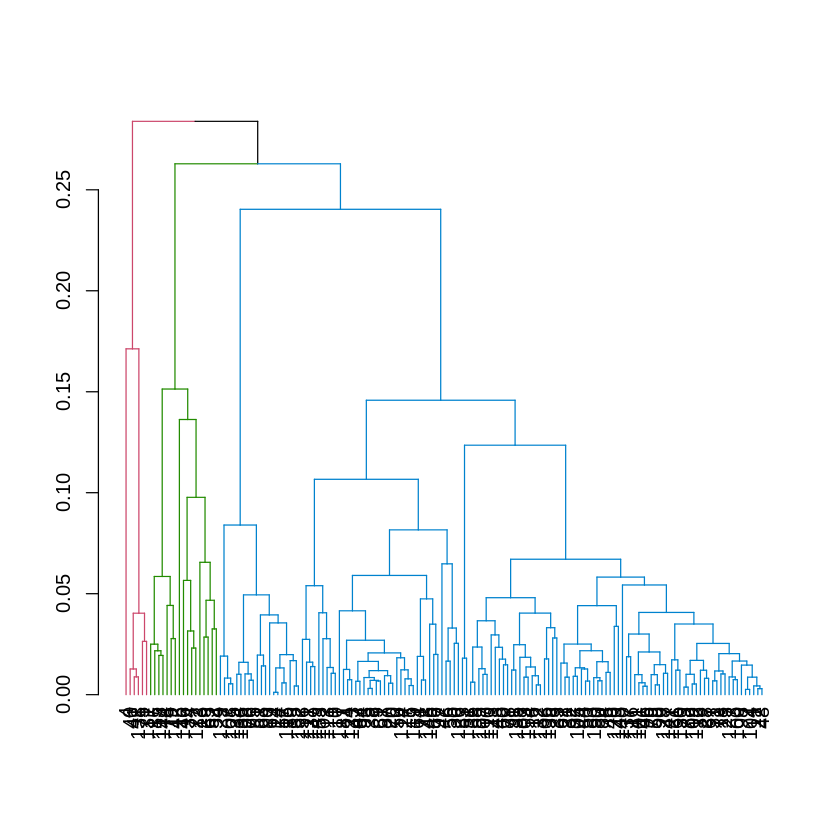

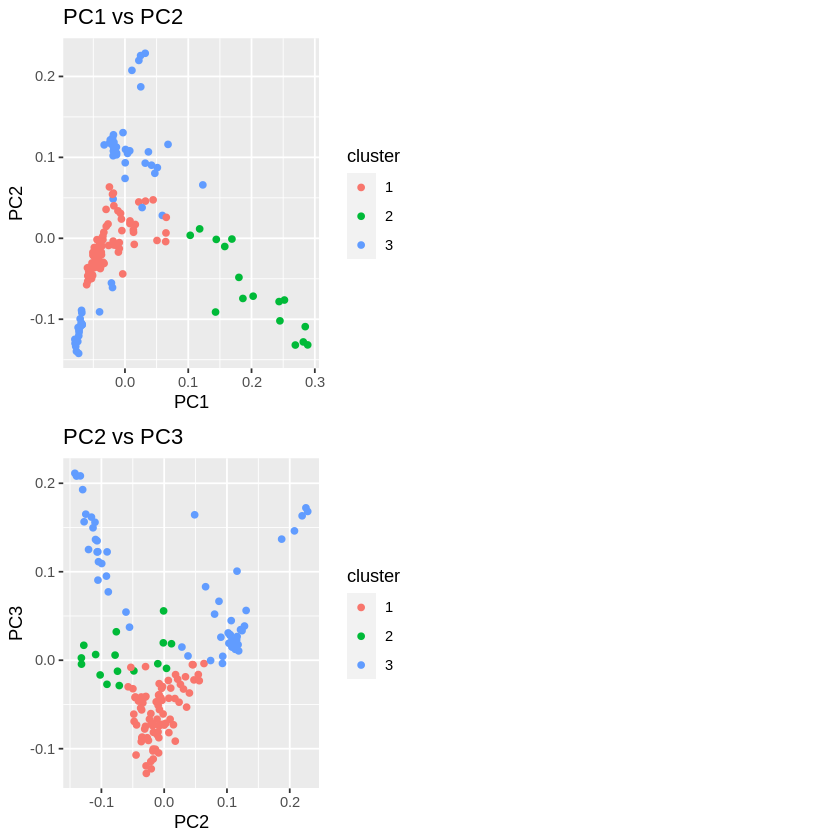

In [78]:
plot1 <- ggplot(k_means_clusters, aes(x = PC1, y = PC2, color = cluster)) + geom_point() + labs(x = "PC1", y = "PC2") + ggtitle("PC1 vs PC2")


dend <- as.dendrogram(single)
dend <- dend %>% color_branches(k = 3)
plot2 <-plot(dend)

dend <- as.dendrogram(average)
dend <- dend %>% color_branches(k = 3)
plot2 <-plot(dend)

grid.arrange(plot1, plot2, plot3, ncol = 2)